## System 1

Copyright: Reid Wyde 2020

last updated: 3.12.20

teatment impulse


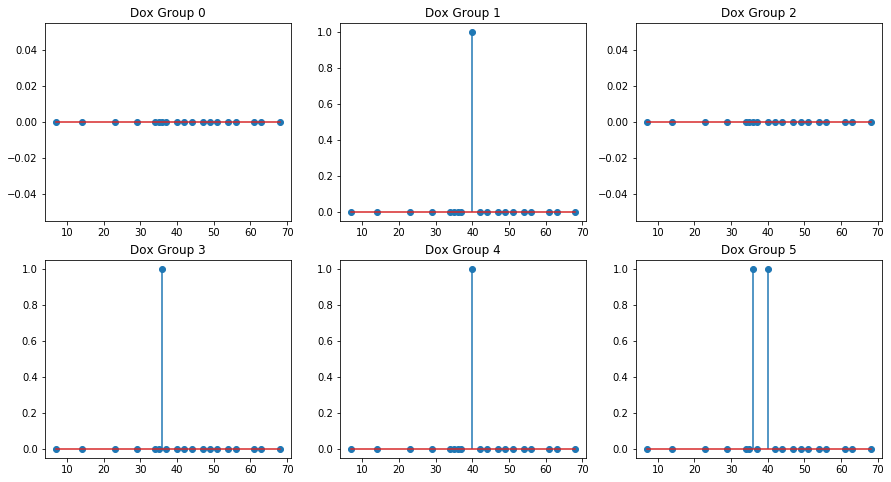

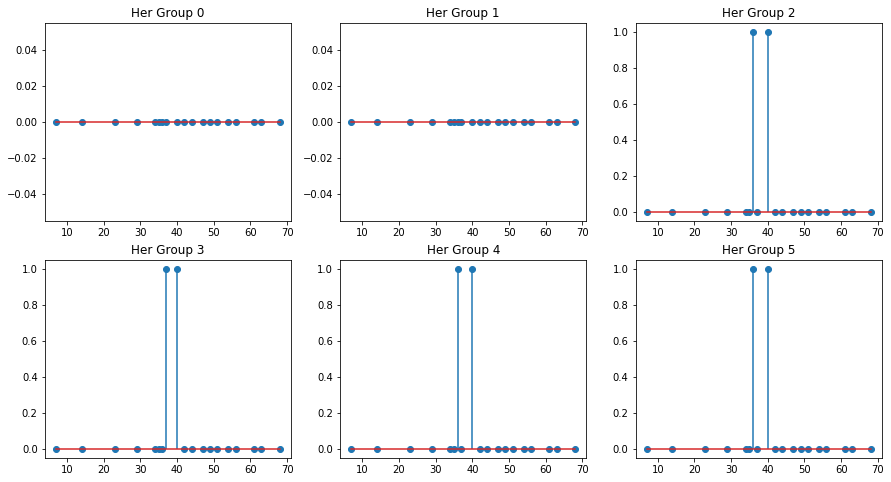

In [1]:
#data
from get_tumor_db import get_tumor_db
from parse_tumor_db import parse_tumor_db

#visualization
import plot_data

#treatment
import treatment_model as tm

#growth model
from growth_model import growth_model_1

#forward model
import rk_utils

#arrays
import numpy as np

#file system
import os

#CSV read
import pandas as pd

import warnings
warnings.filterwarnings("ignore")



np.random.seed(123)

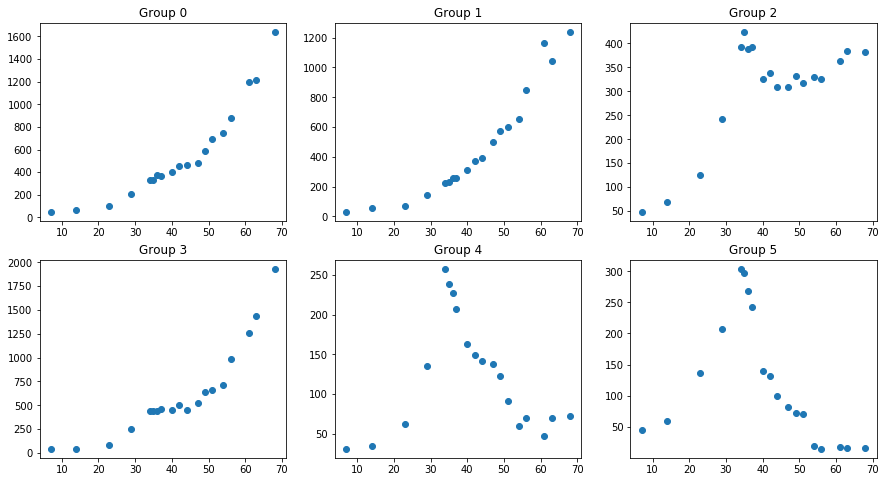

In [2]:
tumor_size_db = get_tumor_db()
ts, Ts, sigmas = parse_tumor_db(tumor_size_db)
plot_data.plot_tumor_data(ts, Ts)

## Growth Model 1


$$ \frac{d \phi_t}{dt} = r \phi_t - \lambda_h \phi_h \phi_t  - \lambda_{hd} \phi_h \phi_d \phi_t $$

$$ \frac{d \phi_d}{dt} = - \tau_d \phi_d + \delta (t - \eta_d) D_d $$

$$ \frac{d \phi_h}{dt} = - \tau_h \phi_h + \delta (t - \eta_h) D_h e^{-\lambda_{dh} \phi_d} $$

r, lambda_h, lambda_d, lambda_hd, tau_d, tau_h, lambda_dh


## Simulate with fixed parameters

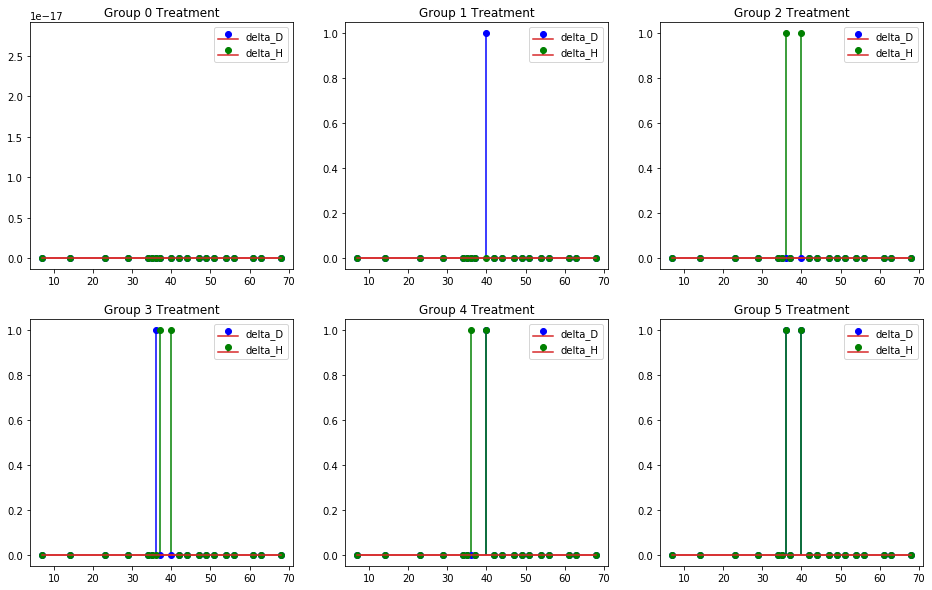

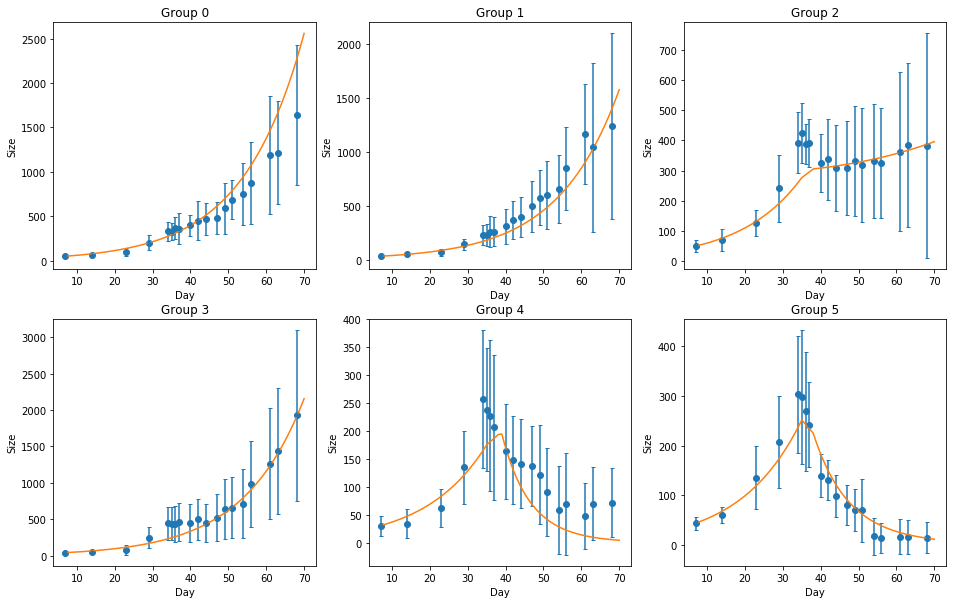

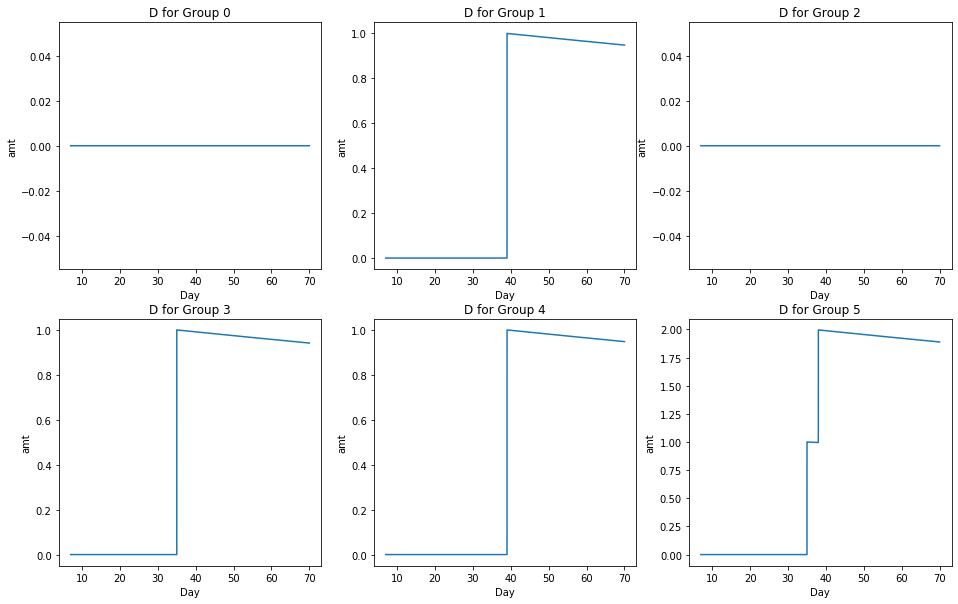

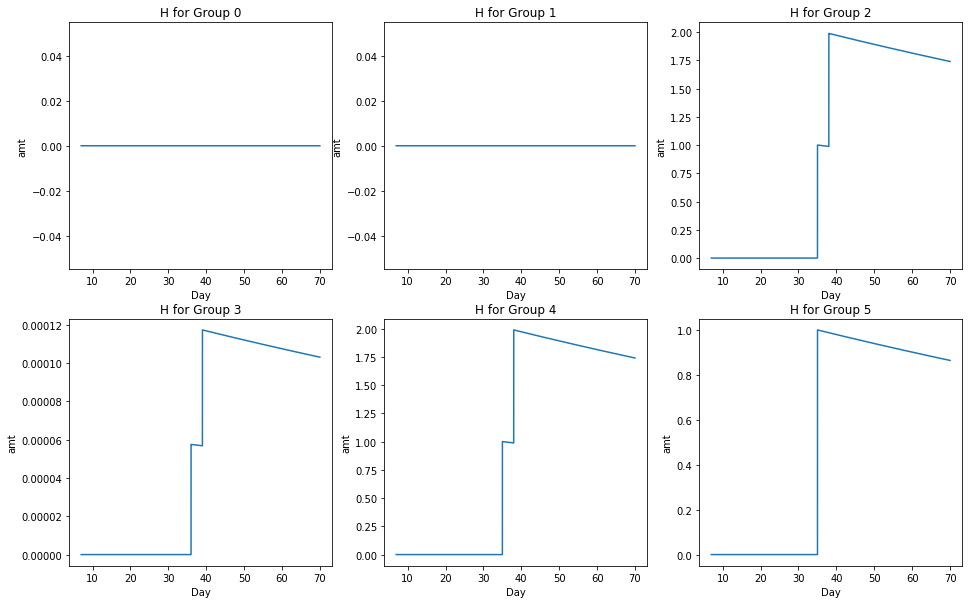

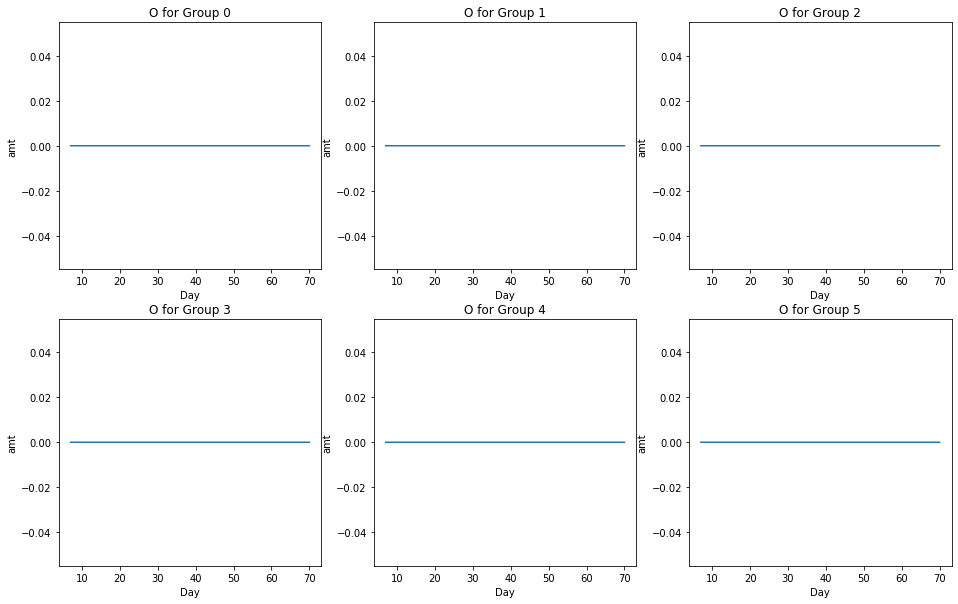

r = 0.0619
lambda_h = 0.0289
lambda_hd = 0.0703
tau_d = 0.00172
tau_h = 0.00417
lambda_dh = 9.78


In [3]:
r = 6.19e-2
lambda_h = 2.89e-2
lambda_hd = 7.03e-2
tau_d = 1.72e-3
tau_h = 4.17e-3
lambda_dh = 9.78
sim_params = np.array([r, lambda_h, lambda_hd, tau_d, tau_h, lambda_dh])

growth_model_1().sim_graph_model(sim_params)

## Fit parameters with MCMC

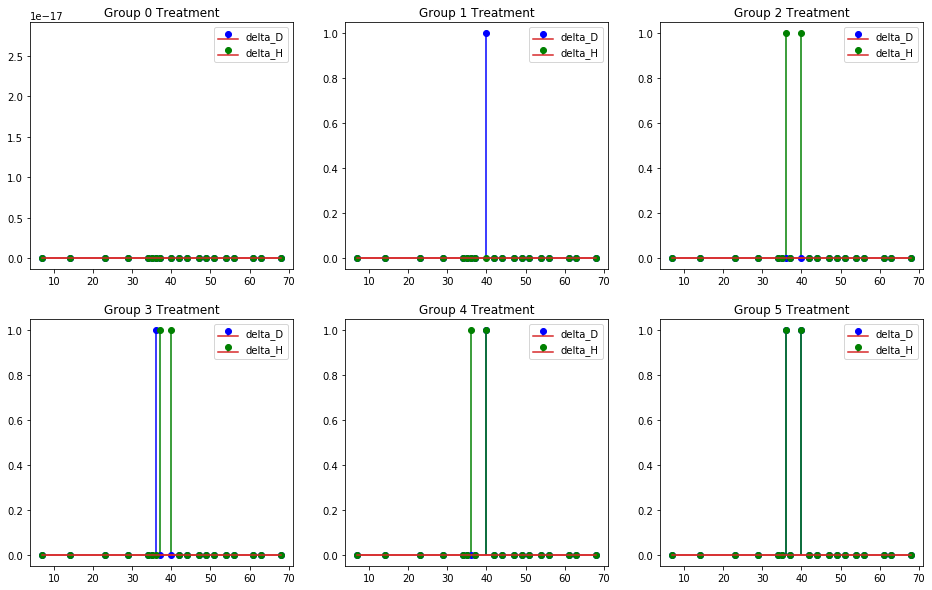

Sequential sampling (40 chains in 1 job)
CompoundStep
>Metropolis: [lambda_dh]
>Metropolis: [tau_h]
>Metropolis: [tau_d]
>Metropolis: [lambda_hd]
>Metropolis: [lambda_h]
>Metropolis: [r]
Sampling chain 23, 0 divergences:   0%|▏                                              | 9/3000 [00:00<05:29,  9.08it/s]

In [ ]:
growth_model_1().fit_sim_graph_model()